In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
team_valuations = pd.read_csv('Team_Valuations_City.csv')  
team_valuations.head(5)

,Item,City,LAT,LONG,Attribute,Value
0,New York Knicks,"New York, NY",40.73061,-73.935242,2010.0,586.0
1,New York Knicks,"New York, NY",40.73061,-73.935242,2011.0,655.0
2,New York Knicks,"New York, NY",40.73061,-73.935242,2012.0,780.0
3,New York Knicks,"New York, NY",40.73061,-73.935242,2013.0,1100.0
4,New York Knicks,"New York, NY",40.73061,-73.935242,2014.0,1400.0


In [3]:
team_valuations= team_valuations.rename(columns={"Item": "Team", "Attribute" : "Year", "Value" : "Valuation (in millions)"})
team_valuations = team_valuations[team_valuations["Team"].notna()]
team_valuations

,Team,City,LAT,LONG,Year,Valuation (in millions)
0,New York Knicks,"New York, NY",40.73061,-73.935242,2010.0,586.0
1,New York Knicks,"New York, NY",40.73061,-73.935242,2011.0,655.0
2,New York Knicks,"New York, NY",40.73061,-73.935242,2012.0,780.0
3,New York Knicks,"New York, NY",40.73061,-73.935242,2013.0,1100.0
4,New York Knicks,"New York, NY",40.73061,-73.935242,2014.0,1400.0
...,...,...,...,...,...,...
295,New Orleans Pelicans,"New Orleans, LA",29.95110,-90.071500,2015.0,650.0
296,New Orleans Pelicans,"New Orleans, LA",29.95110,-90.071500,2016.0,650.0
297,New Orleans Pelicans,"New Orleans, LA",29.95110,-90.071500,2017.0,750.0
298,New Orleans Pelicans,"New Orleans, LA",29.95110,-90.071500,2018.0,1000.0


In [4]:
team_valuations["Year"] = team_valuations["Year"].astype("int")
add_zeroes = "000000"
team_valuations["Valuation (in millions)"] = team_valuations["Valuation (in millions)"].map(str) + add_zeroes
team_valuations["Valuation (in millions)"] = team_valuations["Valuation (in millions)"].str.replace(".", "")
team_valuations.head(5)

<ipython-input-4-ff0daeccc6b2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  team_valuations["Valuation (in millions)"] = team_valuations["Valuation (in millions)"].str.replace(".", "")


,Team,City,LAT,LONG,Year,Valuation (in millions)
0,New York Knicks,"New York, NY",40.73061,-73.935242,2010,5860000000
1,New York Knicks,"New York, NY",40.73061,-73.935242,2011,6550000000
2,New York Knicks,"New York, NY",40.73061,-73.935242,2012,7800000000
3,New York Knicks,"New York, NY",40.73061,-73.935242,2013,11000000000
4,New York Knicks,"New York, NY",40.73061,-73.935242,2014,14000000000


In [5]:
convert_dict = {"City": str,
               "Team": str,
               "Valuation (in millions)": int,
               "LAT": int,
               "LONG" : int
               }
team_valuations_ = team_valuations.copy()
team_valuations_ = team_valuations_.astype(convert_dict)
team_valuations_['Team'] = team_valuations_['Team'].astype(str)
team_valuations_.dtypes

Team                       object
City                       object
LAT                         int64
LONG                        int64
Year                        int64
Valuation (in millions)     int64
dtype: object

In [6]:
#this is a test dataset, this block of code doesn't need to be read
df = px.data.gapminder()
df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


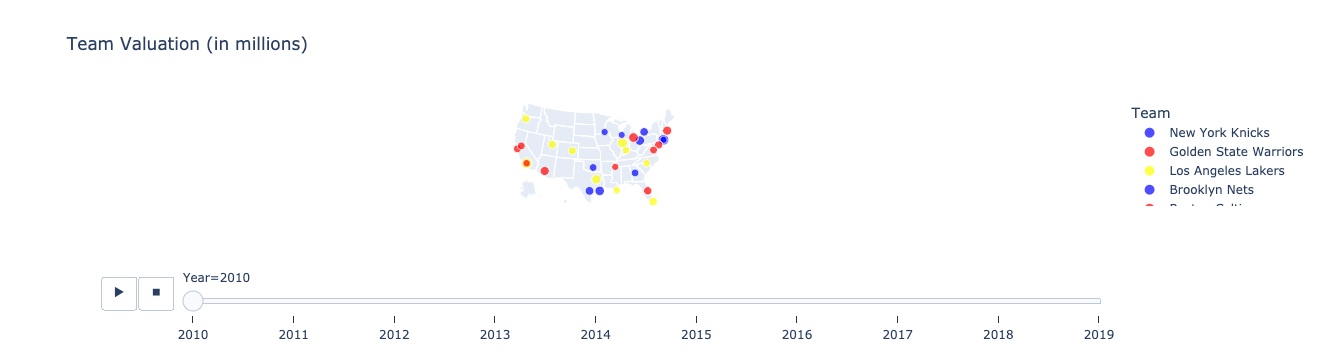

In [8]:
fig = px.scatter_geo(team_valuations_, 
                     lat="LAT", 
                     lon= "LONG", 
                     color="Team",
                     hover_name="Team",
                     title = "Team Valuation (in millions)",
                     color_discrete_sequence = ["blue", "red", "yellow"],
                     #hover_data = {'Team': True, 'City': True, 'LAT':False, 'LONG':False, 'Year': True, 'Valuation (in millions)': True},
                     size="Valuation (in millions)",
                     animation_frame="Year",
                     scope = "usa"
                     )
fig.show()